In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('sample.dat')

In [3]:
def out1(df, dt, dp=0):
    '''
    Input:
        df: Any DataFrame with columns 'timestamp', 'price', 'volume'
        dt: 'Timedelta in hh:mm:ss format'
        dp: integer
    Returns:
        DataFrame with columns 't', 'p' and 'v'
    Example:
    df = pd.DataFrame([[
      pd.to_datetime('2012-12-03 00:00:06'),
      17212,
      '1']],  columns=['timestamp', 'price', 'volume'])
    dt = "00:10:00"
    dp = 10
    out1(df)
    '''
    dt = pd.Timedelta(dt)
    df['price_group'] = (df['price']//dp*dp)
    output1 = df.groupby([
        pd.Grouper(key='timestamp', freq=pd.Timedelta('00:10:00')),
        pd.Grouper(key='price_group') 
    ]).sum()[['volume']].reset_index().rename(columns={'timestamp': 't', 'price_group':'p', 'volume': 'v'})
    output1['t'] = output1['t'].dt.time
    output1['v'] = output1['v'].astype(int)
    return output1

In [4]:
def plot(df2, start, end):
    '''
    Input:
        df2: output from out1(df, start, end)
        start: string in format 'hh:mm:ss'
        end: string in format 'hh:mm:ss'
    Output:
        plot: heatmap between start and end
        data: DataFrame between start and end
    '''
    fig, ax = plt.subplots(figsize=(10,5))
    mask = (
        df2['t'].apply(lambda x: pd.Timestamp(x.strftime('%H:%M:%S')).time())>=pd.Timestamp(start).time()
    ) &(
        df2['t'].apply(lambda x: pd.Timestamp(x.strftime('%H:%M:%S')).time())<=pd.Timestamp(end).time()
    )
    data = df2[mask]
    sns.heatmap(data=data.pivot('p', 't', 'v'), ax=ax, annot=True, fmt='g')
    plt.show()
    return data

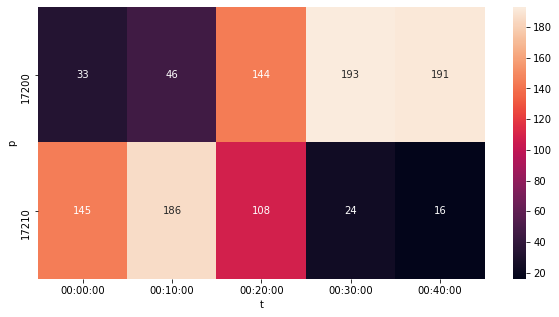

In [5]:
df2 = out1(df, dt="00:10:00", dp=10)
data = plot(df2, start="00:00:00", end="00:40:00")

In [6]:
df2

,t,p,v
0,00:00:00,17200,33
1,00:00:00,17210,145
2,00:10:00,17200,46
3,00:10:00,17210,186
4,00:20:00,17200,144
...,...,...,...
326,23:50:00,17010,524
327,23:50:00,17020,780
328,23:50:00,17030,918
329,23:50:00,17040,489


In [7]:
data

,t,p,v
0,00:00:00,17200,33
1,00:00:00,17210,145
2,00:10:00,17200,46
3,00:10:00,17210,186
4,00:20:00,17200,144
5,00:20:00,17210,108
6,00:30:00,17200,193
7,00:30:00,17210,24
8,00:40:00,17200,191
9,00:40:00,17210,16
